# Project 1 MIMIC-III
NAME: RIAN RENOLD DBRITTO
NUID: 002026598

Cloning repository and fetching data

In [ ]:
!rm -rf mimic-iii-project
!git clone http://github.com/DanielSola/mimic-iii-project
#Clone the repository mimic-iii-project


Cloning into 'mimic-iii-project'...
remote: Enumerating objects: 494, done.
remote: Total 494 (delta 0), reused 0 (delta 0), pack-reused 494 (from 1)
Receiving objects: 100% (494/494), 26.31 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [ ]:
!ls

final_clustered_data.csv  mimic-iii-project  sample_data


In [ ]:
!pwd

/content


In [ ]:
!ls

final_clustered_data.csv  mimic-iii-project  sample_data


In [ ]:
!ls mimic-iii-project


deep_learning_thesis.pdf  labels      mortality_labels_prediction.py  README.md
docs			  main.py     neural_network		      resources
features		  mimic_data  plots			      services


In [ ]:
!ls mimic-iii-project/mimic_data
#listing files inside mimic_data folder

DEMOGRAPHIC_DATA  ICU_DATA  LAB_DATA  PHYSIO_DATA


In [ ]:
!ls mimic-iii-project/mimic_data/DEMOGRAPHIC_DATA


DEMO_DATA.csv


In [ ]:
!ls mimic-iii-project/mimic_data/ICU_DATA


ICD9_DIAG.csv	    PREVIOUS_ADMISSION_COUNT.csv  SEVERITY_SCORES.csv
ICU_LOS.csv	    PROCEDURE_COUTNS.csv	  SURGERY_FLAGS.csv
MECH_VENT_TIME.csv  SERVICES.csv		  TOTAL_LOS.csv


In [ ]:
!ls mimic-iii-project/mimic_data/LAB_DATA


ALBUMIN.csv	   BLOOD_UREA_NITROGEN.csv  PLATELET_COUNT.csv	WHITE_BLOOD_CELLS.csv
BICARBONATE.csv    CREATININE.csv	    POTASSSIUM.csv
BLOOD_GLUCOSE.csv  HEMATROCRIT.csv	    SODIUM.csv


In [ ]:
!ls mimic-iii-project/mimic_data/PHYSIO_DATA


ART_PH.csv  CVP.csv  DIAS_PRESS.csv  HR.csv  RESP_RATE.csv  SPO2.csv  SYS_PRESS.csv  TEMP.csv


**Importing Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from google.colab import files


**Loading demographic, lab test and vital signs datasets**

In [ ]:
# Loading demographic data
df_demo = pd.read_csv("mimic-iii-project/mimic_data/DEMOGRAPHIC_DATA/DEMO_DATA.csv", delimiter="\t")

# Loading lab test data
df_lab = pd.read_csv("mimic-iii-project/mimic_data/LAB_DATA/BLOOD_GLUCOSE.csv", delimiter="\t")

# Loading vital signs data
df_physio = pd.read_csv("mimic-iii-project/mimic_data/PHYSIO_DATA/HR.csv", delimiter="\t")



In [ ]:
# Displaying few rows
df_demo.head(), df_lab.head(), df_physio.head()

(   Unnamed: 0  hadm_id        age gender marital_status   religion ethnicity
 0           0   165315  64.971282      F        MARRIED       NONE     WHITE
 1           1   152223  71.178910      M        MARRIED  CHRISTIAN     WHITE
 2           2   124321  75.306343      M        MARRIED  CHRISTIAN     WHITE
 3           3   161859  39.042949      M         SINGLE  CHRISTIAN     WHITE
 4           4   129635  58.989281      M        MARRIED       NONE     WHITE,
    Unnamed: 0   hadm_id  avg_blood_glucose  std_blood_glucose
 0           0  100001.0         165.428571          80.236875
 1           1  100003.0          96.833333          26.798632
 2           2  100006.0         105.000000          33.578267
 3           3  100007.0         118.333333          28.748913
 4           4  100009.0         152.235294          42.697379,
    Unnamed: 0  hadm_id      avg_hr     std_hr
 0           0   100001  111.313953  12.399489
 1           1   100003   81.218182   8.343751
 2         

In [ ]:
import pandas as pd

# Load demographic data
df_demo = pd.read_csv("mimic-iii-project/mimic_data/DEMOGRAPHIC_DATA/DEMO_DATA.csv", delimiter="\t", index_col=0)

# Load lab test data
df_lab = pd.read_csv("mimic-iii-project/mimic_data/LAB_DATA/BLOOD_GLUCOSE.csv", delimiter="\t", index_col=0)

# Load vital signs data
df_physio = pd.read_csv("mimic-iii-project/mimic_data/PHYSIO_DATA/HR.csv", delimiter="\t", index_col=0)

# Display first few rows
df_demo.head(), df_lab.head(), df_physio.head()

(   hadm_id        age gender marital_status   religion ethnicity
 0   165315  64.971282      F        MARRIED       NONE     WHITE
 1   152223  71.178910      M        MARRIED  CHRISTIAN     WHITE
 2   124321  75.306343      M        MARRIED  CHRISTIAN     WHITE
 3   161859  39.042949      M         SINGLE  CHRISTIAN     WHITE
 4   129635  58.989281      M        MARRIED       NONE     WHITE,
     hadm_id  avg_blood_glucose  std_blood_glucose
 0  100001.0         165.428571          80.236875
 1  100003.0          96.833333          26.798632
 2  100006.0         105.000000          33.578267
 3  100007.0         118.333333          28.748913
 4  100009.0         152.235294          42.697379,
    hadm_id      avg_hr     std_hr
 0   100001  111.313953  12.399489
 1   100003   81.218182   8.343751
 2   100006  108.630252   9.944648
 3   100007   79.444444  11.623253
 4   100009   68.968750  12.208465)

In [ ]:
print("Missing values in Demographic Data:")
print(df_demo.isnull().sum())

print("\nMissing values in Lab Test Data:")
print(df_lab.isnull().sum())

print("\nMissing values in Vital Signs Data:")
print(df_physio.isnull().sum())


Missing values in Demographic Data:
hadm_id           0
age               0
gender            0
marital_status    0
religion          0
ethnicity         0
dtype: int64

Missing values in Lab Test Data:
hadm_id                 1
avg_blood_glucose       4
std_blood_glucose    1169
dtype: int64

Missing values in Vital Signs Data:
hadm_id       0
avg_hr     1121
std_hr     2988
dtype: int64


**Filling missing values**

In [ ]:
df_lab.fillna(df_lab.select_dtypes(include=[np.number]).median(), inplace=True)
print("Missing values in Lab Test Data after filling:")
print(df_lab.isnull().sum())
df_physio.fillna(df_physio.select_dtypes(include=[np.number]).median(), inplace=True)
print("\nMissing values in Vital Signs Data after filling:")
print(df_physio.isnull().sum())


Missing values in Lab Test Data after filling:
hadm_id              0
avg_blood_glucose    0
std_blood_glucose    0
dtype: int64

Missing values in Vital Signs Data after filling:
hadm_id    0
avg_hr     0
std_hr     0
dtype: int64


**Normalizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numerical columns for scaling
df_demo_scaled = scaler.fit_transform(df_demo.select_dtypes(include=['number']))
df_lab_scaled = scaler.fit_transform(df_lab.select_dtypes(include=['number']))
df_physio_scaled = scaler.fit_transform(df_physio.select_dtypes(include=['number']))

# Convert back to DataFrame
df_demo_scaled = pd.DataFrame(df_demo_scaled, columns=df_demo.select_dtypes(include=['number']).columns)
df_lab_scaled = pd.DataFrame(df_lab_scaled, columns=df_lab.select_dtypes(include=['number']).columns)
df_physio_scaled = pd.DataFrame(df_physio_scaled, columns=df_physio.select_dtypes(include=['number']).columns)

# Display first few rows to verify scaling
df_demo_scaled.head(), df_lab_scaled.head(), df_physio_scaled.head()

(    hadm_id       age
 0  0.531256  0.358080
 1  0.077977  0.585330
 2 -0.888064  0.736428
 3  0.411600 -0.591109
 4 -0.704079  0.139090,
     hadm_id  avg_blood_glucose  std_blood_glucose
 0 -1.728987           0.783816           1.110922
 1 -1.728918          -0.888317          -0.291085
 2 -1.728814          -0.689240          -0.113215
 3 -1.728779          -0.364216          -0.239918
 4 -1.728710           0.462206           0.126034,
     hadm_id    avg_hr    std_hr
 0 -1.730009  0.039852 -0.003733
 1 -1.729940 -0.030244 -0.004694
 2 -1.729836  0.033601 -0.004315
 3 -1.729801 -0.034375 -0.003917
 4 -1.729732 -0.058774 -0.003779)

**Combining the processed data**

In [ ]:
df_combined = pd.concat([df_demo_scaled, df_lab_scaled, df_physio_scaled], axis=1)
df_combined.head()
print(df_combined.shape)
df_combined = df_combined.dropna()
df_combined = df_combined.select_dtypes(include=[np.number])  # Remove non-numeric columns
scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_combined)

(58976, 8)


In [ ]:
df_subset = df_combined.head(500)


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hadm_id            500 non-null    float64
 1   age                500 non-null    float64
 2   hadm_id            500 non-null    float64
 3   avg_blood_glucose  500 non-null    float64
 4   std_blood_glucose  500 non-null    float64
 5   hadm_id            500 non-null    float64
 6   avg_hr             500 non-null    float64
 7   std_hr             500 non-null    float64
dtypes: float64(8)
memory usage: 35.2 KB


In [ ]:
# Importing necessary libraries
import pandas as pd

sample_size = 500

# Taking a random sample from the dataset before clustering
df_sampled = df_combined.sample(n=sample_size, random_state=42)

# Checking the shape of the sampled dataset
print("Sampled dataset shape:", df_sampled.shape)


Sampled dataset shape: (500, 8)


**Replacing missing values with column wise median**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df_subset.fillna(df_subset.median(), inplace=True)
scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_subset)

<ipython-input-22-1a0f943c6711>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.fillna(df_subset.median(), inplace=True)


**PCA(Principal Component Analysis) method**: It will help to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_subset)

# **K-Means Clustering**

**Performing K-means Clustering using elbow method to determine optimal number of clusters**

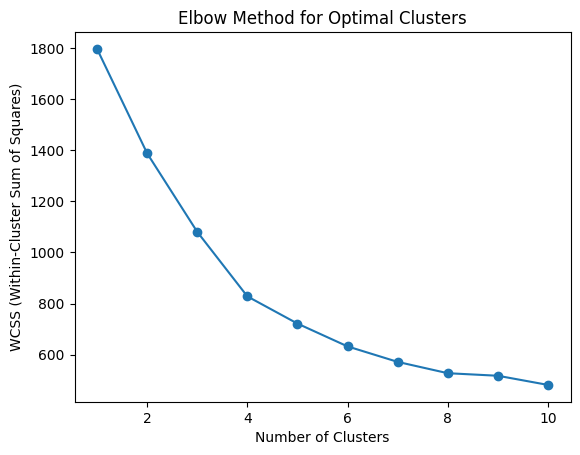

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_subset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

**Observation**: The Elbow Method graph here depicts the relationship between the number of clusters and the Within-Cluster Sum of Squares (WCSS). Initially, as the number of clusters increases from 1 to 4, there is a significant drop in WCSS,which indicates that adding clusters effectively reduces intra-cluster variance. However, beyond k = 4, the rate of decrease slows down, forming an "elbow" point. This suggests that adding more clusters beyond this point results in only marginal improvements, that will lead to overfitting. Therefore, 4 clusters appear to be the optimal choice, balancing compact clusters and avoiding unnecessary complexity.

**Now performing K-Means clustering with 4 clusters since optimal_clusters = 4.**

In [ ]:
from sklearn.cluster import KMeans
optimal_clusters = 4
# Performing K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_subset)
cluster_labels = kmeans.labels_
df_subset['Cluster'] = cluster_labels

<ipython-input-25-17bbb55e43a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster'] = cluster_labels


**Visualizing the K-means clustering results**

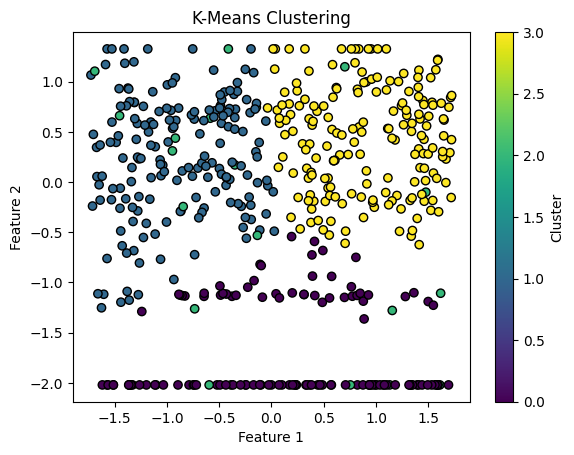

In [ ]:
plt.scatter(df_subset.iloc[:, 0], df_subset.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

**Observation**: The graph shows K-Means clustering with four clusters, but the separation is unclear, which indicates poor-defined clusters. The dense packing suggests that K-Means may not be the best method, and outliers (dark purple points) might be present.



**Checking Silhouette Score**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df_subset['Cluster_KMeans'] = kmeans.fit_predict(df_reduced)  # Assign cluster labels
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_reduced, df_subset['Cluster_KMeans'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans:.3f}")


Silhouette Score for K-Means: 0.303


<ipython-input-27-c6761466b026>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cluster_KMeans'] = kmeans.fit_predict(df_reduced)  # Assign cluster labels


**Observation**: The Silhouette Score is 0.303,is not that good. It indicates that, overlapping clusters may not be well seperated. Hence, K-Means might not be the best choice, or the chosen number of clusters is not optimal.

# **Hierarchical Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

**Plotting the Dendrogram**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print(df_subset.shape)
df_subset = df_subset.dropna()
df_subset = df_subset.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_subset)

linked = linkage(df_combined_scaled, method='ward')


(500, 10)


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
linked = linkage(df_reduced, method='ward')  # 'ward' linkage is commonly used

max_d = 3.0
clusters = fcluster(linked, max_d, criterion='distance')
num_clusters = len(set(clusters))
print(f'Optimal number of clusters: {num_clusters}')

Optimal number of clusters: 37


In [ ]:
df_subset['Cluster_Hierarchical'] = clusters


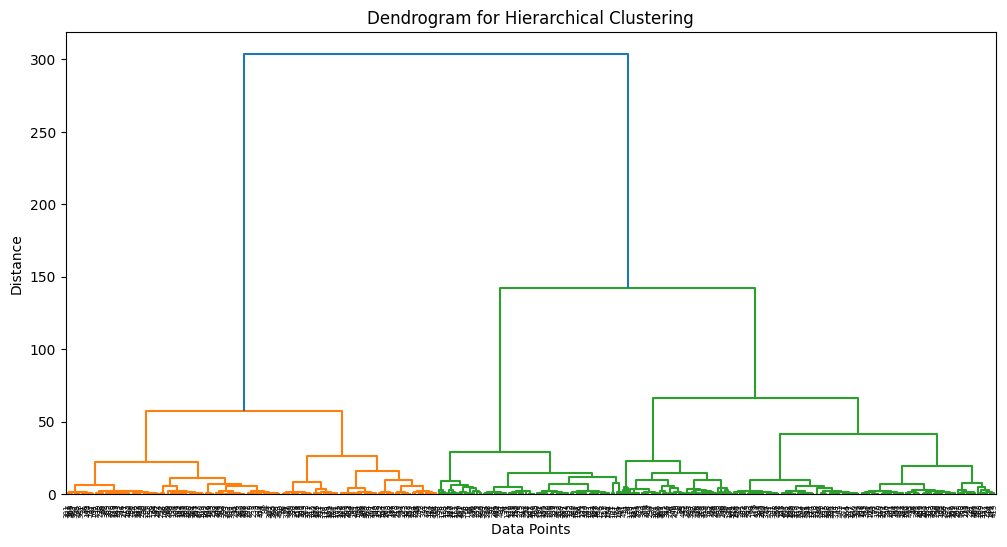

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

**Visualizing Hierarchical clustering**

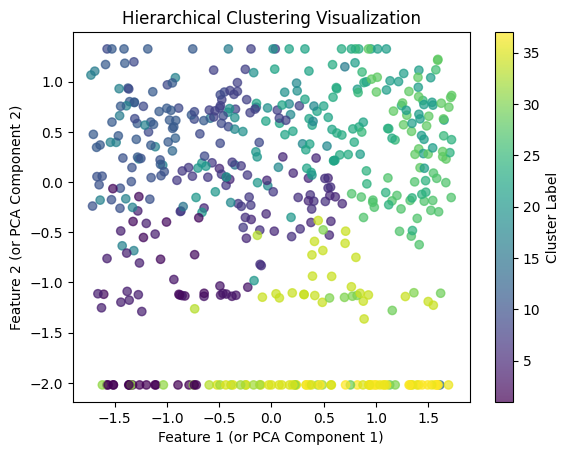

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_subset.iloc[:, 0], df_subset.iloc[:, 1], c=df_subset['Cluster_Hierarchical'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Cluster Label")
plt.xlabel("Feature 1 (or PCA Component 1)")
plt.ylabel("Feature 2 (or PCA Component 2)")
plt.title("Hierarchical Clustering Visualization")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already run K-Means and Hierarchical Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df_subset)

# Silhouette Score
silhouette_avg = silhouette_score(df_subset, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.582671092177271


In [ ]:
from sklearn.cluster import KMeans

optimal_k = 5  # Set based on the previous Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_subset['Cluster_KMeans'] = kmeans.fit_predict(df_subset.drop(columns=['Cluster_Hierarchical'], errors='ignore'))

**Comparing K-means and Hierarchical Clustering**

In [ ]:
comparison = df_subset[['Cluster_Hierarchical', 'Cluster_KMeans']]
print(comparison.value_counts())  # Check alignment of clustering results


Cluster_Hierarchical  Cluster_KMeans
11                    2                 35
28                    3                 28
21                    3                 26
27                    3                 24
34                    0                 22
22                    3                 22
23                    3                 19
9                     2                 19
7                     2                 19
35                    0                 18
1                     0                 17
8                     2                 17
10                    2                 16
37                    0                 15
36                    0                 14
17                    2                 14
4                     2                 13
5                     3                 12
20                    2                 10
24                    1                 10
5                     2                  9
2                     2                  9
3                

**Conclusion**: Hierarchical clustering performed better than K-Means, but both methods require tuning for optimal results.

**Analysing cluster alignment**

In [ ]:
print("Unique clusters in K-Means:", df_subset['Cluster_KMeans'].nunique())
print("Unique clusters in Hierarchical Clustering:", df_subset['Cluster_Hierarchical'].nunique())


Unique clusters in K-Means: 5
Unique clusters in Hierarchical Clustering: 37


**Visualizing cluster distribution**

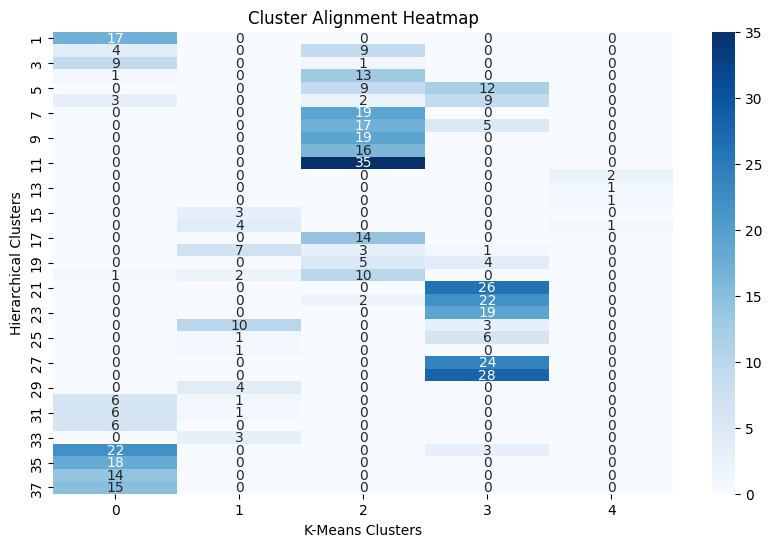

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df_subset['Cluster_Hierarchical'], df_subset['Cluster_KMeans']), annot=True, cmap="Blues", fmt="d")
plt.xlabel("K-Means Clusters")
plt.ylabel("Hierarchical Clusters")
plt.title("Cluster Alignment Heatmap")
plt.show()


**Observation:** the heatmap depicts that hierarhical clustering identifies more subgroups whils K-means clusters are broader.

**Scatter plot of both the clusters**

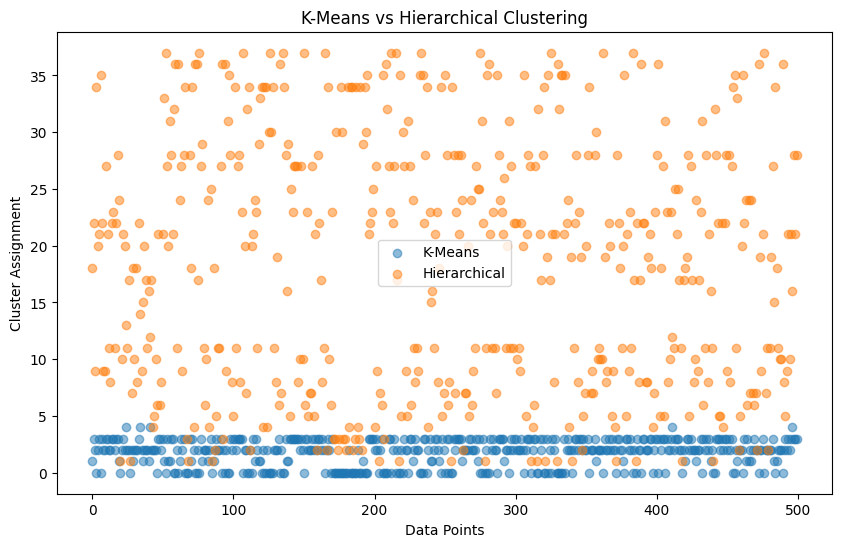

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df_subset.index, df_subset['Cluster_KMeans'], label="K-Means", alpha=0.5)
plt.scatter(df_subset.index, df_subset['Cluster_Hierarchical'], label="Hierarchical", alpha=0.5)

plt.xlabel("Data Points")
plt.ylabel("Cluster Assignment")
plt.title("K-Means vs Hierarchical Clustering")
plt.legend()
plt.show()


**Determining Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_subset)
    score = silhouette_score(df_subset, labels)
    print(f"K: {k}, Silhouette Score: {score:.3f}")


K: 2, Silhouette Score: 0.626
K: 3, Silhouette Score: 0.626
K: 4, Silhouette Score: 0.582
K: 5, Silhouette Score: 0.561
K: 6, Silhouette Score: 0.532
K: 7, Silhouette Score: 0.514
K: 8, Silhouette Score: 0.470
K: 9, Silhouette Score: 0.479


**Adjusting Hierarchical Clustering Parameters**


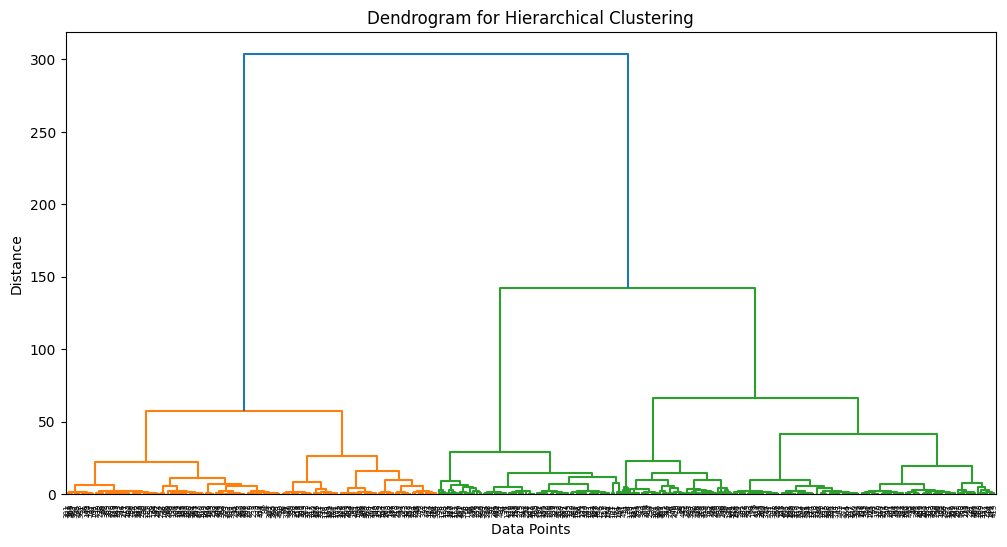

In [ ]:
linked = linkage(df_subset, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Observation:** There are large vertical distances at the top of the dendrogram, indicating the presence of a few dominant clusters. A natural break can be observed around 2 to 4 clusters before branches split significantly.

In [ ]:
# Save final clustered dataset
df_combined.to_csv("final_clustered_data.csv", index=False)
print("Final clustered data saved as 'final_clustered_data.csv'")

Final clustered data saved as 'final_clustered_data.csv'
